In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train),(x_test, y_test)= mnist.load_data()

In [5]:
x_train[1234].shape

(28, 28)

In [6]:
#CNN可以直接送矩陣, CNN要(28,28,1), 其中 1 是 Channel
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
x_train[1234].shape

(28, 28, 1)

In [8]:
# 變回原本的矩陣
X = x_train[1234]
X= X.reshape(28,28)

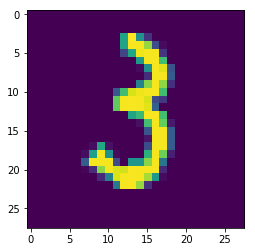

In [9]:
plt.imshow(X)

$對 y-train 和 y- test 做 one- hot encoding$

In [10]:
from keras.utils import np_utils

In [11]:
y_train = np_utils.to_categorical(y_train,10) 
y_test = np_utils.to_categorical(y_test,10)

Normalization to [0, 1]

In [12]:
#灰階 0-255,沒有做 CNN 會很飄
x_train = x_train/255
x_test = x_test/255

# 製作第一個 CNN - model

In [13]:
#CONVOLUTION 3 TIMES
#FILTER 5X5 
#NO.1 FILTER > 18 → 36 → 54, FILTER 愈變愈多，因為最後是各類型的組合
#DENSE NEURONS 9
#OUTPUT NEURONS 10

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [15]:
model = Sequential()
#第一次的Convolution 
#filter size =5x5, with 18 
model.add(Conv2D(18,(5,5),padding = 'same', input_shape=(28,28,1)))
model.add(Activation('relu'))
#MaxPooling
model.add(MaxPool2D(pool_size = (2,2)))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
#第二次的Convolution 
#filter size =5x5, with 36 
model.add(Conv2D(36,(5,5),padding = 'same'))
model.add(Activation('relu'))
#MaxPooling
model.add(MaxPool2D(pool_size = (2,2)))

In [17]:
#第三次的Convolution 
#filter size =5x5, with 54 
model.add(Conv2D(54,(5,5),padding = 'same'))
model.add(Activation('relu'))
#MaxPooling
model.add(MaxPool2D(pool_size = (2,2)))

In [18]:
#一層Dense
#先拉平Flatten
model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

In [19]:
#最後的Output層
model.add(Dense(10))
model.add(Activation('softmax'))

In [23]:
#統整神經網路
model.compile(loss = "categorical_crossentropy", optimizer = SGD(lr=0.07), metrics = ['accuracy'])
#model.compile(loss = 'mse', optimizer = SGD(lr=0.07), metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 18)        468       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 18)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        16236     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 36)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 54)          48654     
__________

In [25]:
model.fit(x_train, y_train, batch_size = 100, epochs = 10)
#若遇到 Dead kernel要重開

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.5506 - acc: 0.8214
Epoch 2/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0943 - acc: 0.9720
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0609 - acc: 0.9809
Epoch 4/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0450 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0366 - acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0304 - acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0263 - acc: 0.9917
Epoch 8/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0216 - acc: 0.9932
Epoch 9/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0192 - acc: 0.9942
Epoch 10/10
60000/60000 [===========================

In [26]:
score = model.evaluate(x_test, y_test)
print('loss:',score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 6s 631us/step
loss: 0.03073244209108343
accuracy: 0.9911


# 製作第二個 CNN - model_1

改變 Filter 大小

In [27]:
#CONVOLUTION 3 TIMES
#FILTER 8X8 
#NO.1 FILTER > 18 → 36 → 54, FILTER 愈變愈多，因為最後是各類型的組合
#DENSE NEURONS 9
#OUTPUT NEURONS 10
#MaxPool size =(2x2)

In [28]:
model_1 = Sequential()
#第一次的Convolution 
#filter size =8x8, with 18 
model_1.add(Conv2D(18,(8,8),padding = 'same', input_shape=(28,28,1)))
model_1.add(Activation('relu'))
#MaxPooling
model_1.add(MaxPool2D(pool_size = (2,2)))

#第二次的Convolution 
#filter size =8x8, with 36 
model_1.add(Conv2D(36,(8,8),padding = 'same'))
model_1.add(Activation('relu'))
#MaxPooling
model_1.add(MaxPool2D(pool_size = (2,2)))

#第三次的Convolution 
#filter size =8x8, with 54 
model_1.add(Conv2D(54,(8,8),padding = 'same'))
model_1.add(Activation('relu'))
#MaxPooling
model_1.add(MaxPool2D(pool_size = (2,2)))

#一層Dense
#先拉平Flatten
model_1.add(Flatten())
model_1.add(Dense(9))
model_1.add(Activation('relu'))

#最後的Output層
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

#統整神經網路
model_1.compile(loss = "categorical_crossentropy", optimizer = SGD(lr=0.07), metrics = ['accuracy'])

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 18)        1170      
_________________________________________________________________
activation_6 (Activation)    (None, 28, 28, 18)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 18)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 36)        41508     
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 36)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 54)          124470    
__________

In [29]:
model_1.fit(x_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.4458 - acc: 0.8529
Epoch 2/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0824 - acc: 0.9751
Epoch 3/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0540 - acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0404 - acc: 0.9870
Epoch 5/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0311 - acc: 0.9904
Epoch 6/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0252 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0205 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0151 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0123 - acc: 0.9960
Epoch 10/10
60000/60000 [==============================] - 129s 2ms/step - loss: 0.0100 - a

In [30]:
score = model_1.evaluate(x_test, y_test)
print('loss:',score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 7s 711us/step
loss: 0.03226141093037004
accuracy: 0.9902


# 製作第三個 CNN - model_2

改變 MaxPool size = 3x3

In [31]:
#CONVOLUTION 3 TIMES
#FILTER 5X5 
#NO.1 FILTER > 18 → 36 → 54, FILTER 愈變愈多，因為最後是各類型的組合
#DENSE NEURONS 9
#OUTPUT NEURONS 10
#MaxPool size =(3x3)

In [37]:
model_2 = Sequential()
#第一次的Convolution 
#filter size =5x5, with 18 
model_2.add(Conv2D(18,(5,5),padding = 'same', input_shape=(28,28,1)))
model_2.add(Activation('relu'))
#MaxPooling
model_2.add(MaxPool2D(pool_size = (3,3)))

#第二次的Convolution 
#filter size =5x5, with 36 
model_2.add(Conv2D(36,(5,5),padding = 'same'))
model_2.add(Activation('relu'))
#MaxPooling
model_2.add(MaxPool2D(pool_size = (3,3)))

#第三次的Convolution 
#filter size =5x5, with 54 
model_2.add(Conv2D(54,(5,5),padding = 'same'))
model_2.add(Activation('relu'))
#MaxPooling
model_2.add(MaxPool2D(pool_size = (3,3)))

#一層Dense
#先拉平Flatten
model_2.add(Flatten())
model_2.add(Dense(9))
model_2.add(Activation('relu'))

#最後的Output層
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

#統整神經網路
model_2.compile(loss = "categorical_crossentropy", optimizer = SGD(lr=0.07), metrics = ['accuracy'])

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 18)        468       
_________________________________________________________________
activation_27 (Activation)   (None, 28, 28, 18)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 9, 9, 18)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 36)          16236     
_________________________________________________________________
activation_28 (Activation)   (None, 9, 9, 36)          0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 36)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 54)          48654     
__________

In [38]:
model_2.fit(x_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 31s 521us/step - loss: 0.7287 - acc: 0.7602
Epoch 2/10
60000/60000 [==============================] - 33s 554us/step - loss: 0.1031 - acc: 0.9691
Epoch 3/10
60000/60000 [==============================] - 35s 586us/step - loss: 0.0694 - acc: 0.9782
Epoch 4/10
60000/60000 [==============================] - 36s 602us/step - loss: 0.0527 - acc: 0.9835
Epoch 5/10
60000/60000 [==============================] - 38s 629us/step - loss: 0.0437 - acc: 0.9864
Epoch 6/10
60000/60000 [==============================] - 39s 646us/step - loss: 0.0370 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.0318 - acc: 0.9900
Epoch 8/10
60000/60000 [==============================] - 39s 645us/step - loss: 0.0268 - acc: 0.9917
Epoch 9/10
60000/60000 [==============================] - 39s 643us/step - loss: 0.0231 - acc: 0.9930
Epoch 10/10
60000/60000 [==============================] - 39s 643us/step - loss: 

In [39]:
score = model_2.evaluate(x_test, y_test)
print('loss:',score[0])
print('accuracy:', score[1])

10000/10000 [==============================] - 3s 254us/step
loss: 0.03359456432157312
accuracy: 0.9893


# 小結

1.第一個模型，是依照上課的CNN，增加每層Filter的數量，增加為(18, 36, 54)。Accuracy 比上課的結果要好。


    第一個模型，也將與第二、第三模型做比較

2.第二個模型改變Filter size to 8x8，雖然跟'模型一'比起來，在 training data 時，accuracy較快達到 99% 。

    但在使用 testing data 測試後，accuracy 卻比'模型一'低了些。

3.第三個模型改變MaxPooling size to 3x3，也就是說 MaxPool size跟'模型一'比起來，size是變大的。

    然而在 training data 和 testing data 時，accuracy 的表現比'模型一'來得差。